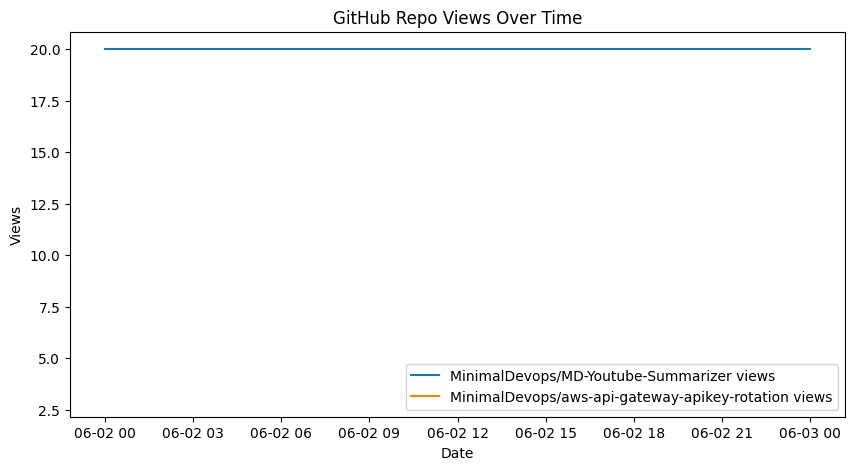

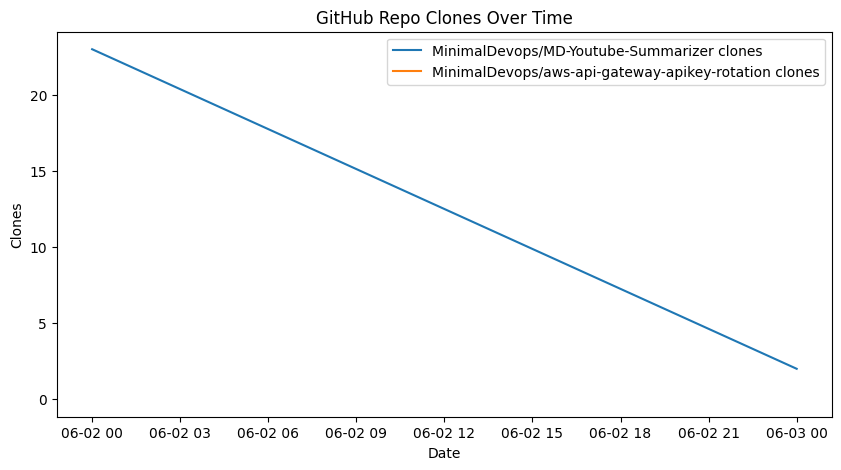

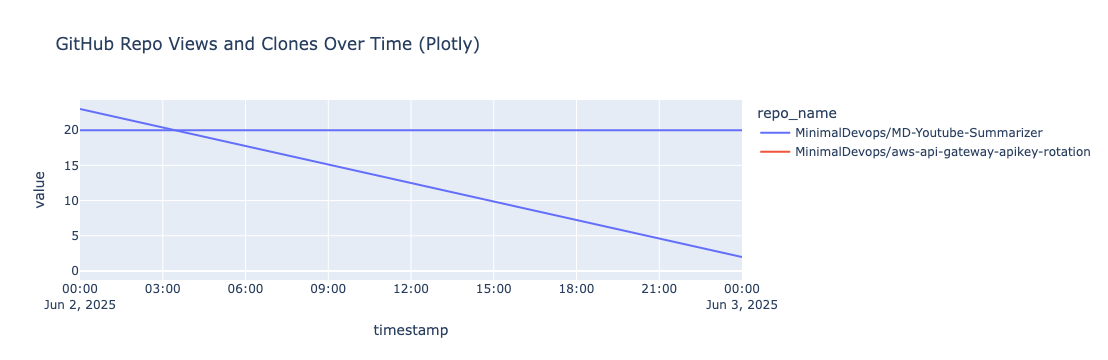

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()

engine = create_engine(
    f"postgresql://{os.getenv('SUPABASE_USER')}:{os.getenv('SUPABASE_PASSWORD')}@{os.getenv('SUPABASE_HOST')}:{os.getenv('SUPABASE_PORT')}/{os.getenv('SUPABASE_DB')}"
)
df = pd.read_sql('SELECT * FROM github_traffic', engine)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Debug: Show repo names and data
#print("Repo names in DataFrame:", df['repo_name'].unique())
#print(df[['repo_name', 'timestamp', 'total_views', 'total_clones']])

# Scatter Plot: Views and Clones
plt.figure(figsize=(10,5))
for repo in df['repo_name'].unique():
    repo_df = df[df['repo_name'] == repo]
    plt.scatter(repo_df['timestamp'], repo_df['total_views'], label=f'{repo} views')
    plt.scatter(repo_df['timestamp'], repo_df['total_clones'], label=f'{repo} clones')
plt.legend()
plt.title('GitHub Repo Views and Clones Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()
